# LEVEL 1

**TASK 1**

In [3]:
import pandas as pd
path="/content/sample_data/Restuarant.csv"
df=pd.read_csv(path)
print("The number of rows and columns in this dataset are : ",df.shape)

The number of rows and columns in this dataset are :  (9551, 21)


In [4]:
missing_values=df.isnull().sum()
print("The missing values in this dataset are : \n",missing_values)

The missing values in this dataset are : 
 Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [5]:
cuisines_mode = df['Cuisines'].mode()[0]
print("Mode of Cuisines column is :", cuisines_mode)
df['Cuisines'] = df['Cuisines'].fillna(cuisines_mode)
print("Missing values in Cuisines", df['Cuisines'].isnull().sum())

Mode of Cuisines column is : North Indian
Missing values in Cuisines 0


In [6]:
print("Data types:\n", df.dtypes)

Data types:
 Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object


In [7]:
df['Average Cost for two'] = df['Average Cost for two'].astype('float64')
df['Price range'] = df['Price range'].astype('float64')

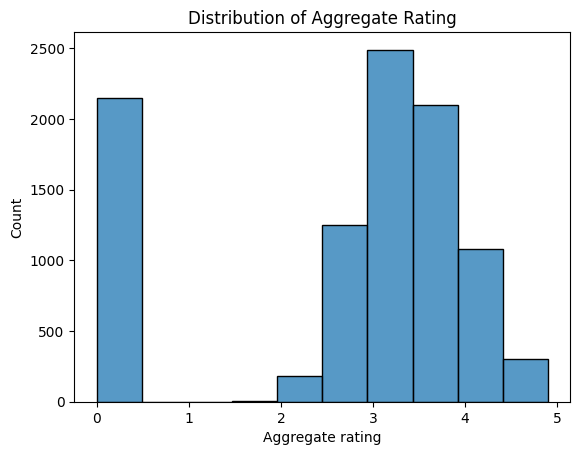

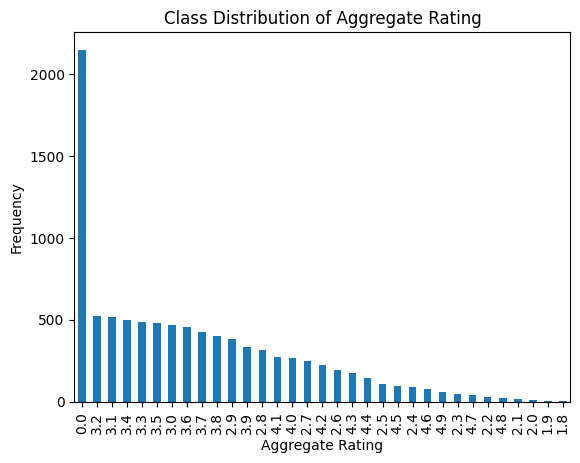

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df['Aggregate rating'], bins=10)
plt.title("Distribution of Aggregate Rating")
plt.show()
df['Aggregate rating'].value_counts().plot(kind='bar', title="Class Distribution of Aggregate Rating")
plt.xlabel("Aggregate Rating")
plt.ylabel("Frequency")
plt.show()

 **TASK 2**

In [10]:
numerical_columns = df.select_dtypes(include=['float64', 'int64'])
statistical_measures = numerical_columns.describe()
print("Basic Statistical Measures:\n", statistical_measures)
standard_deviation = numerical_columns.std()
print("\nStandard Deviation:\n", standard_deviation)


Basic Statistical Measures:
        Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              25

Distribution of Country Code:
 Country Code
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: count, dtype: int64


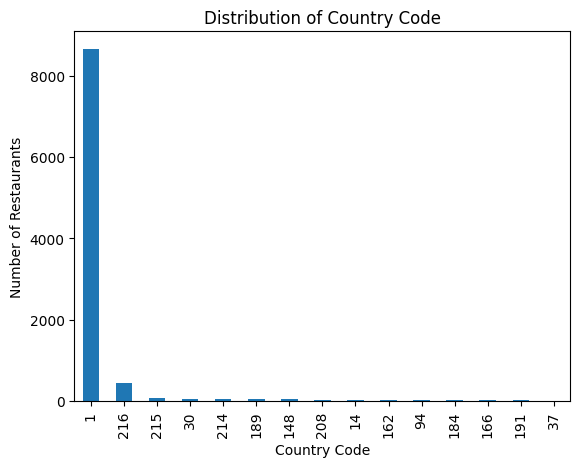

In [ ]:
country_code = df['Country Code'].value_counts()
print("Distribution of Country Code:\n", country_code)
country_code.plot(kind='bar', title='Distribution of Country Code') #, figsize=(10, 6)
plt.xlabel('Country Code')
plt.ylabel('Number of Restaurants')
plt.show()



City Distribution:
 City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: count, dtype: int64


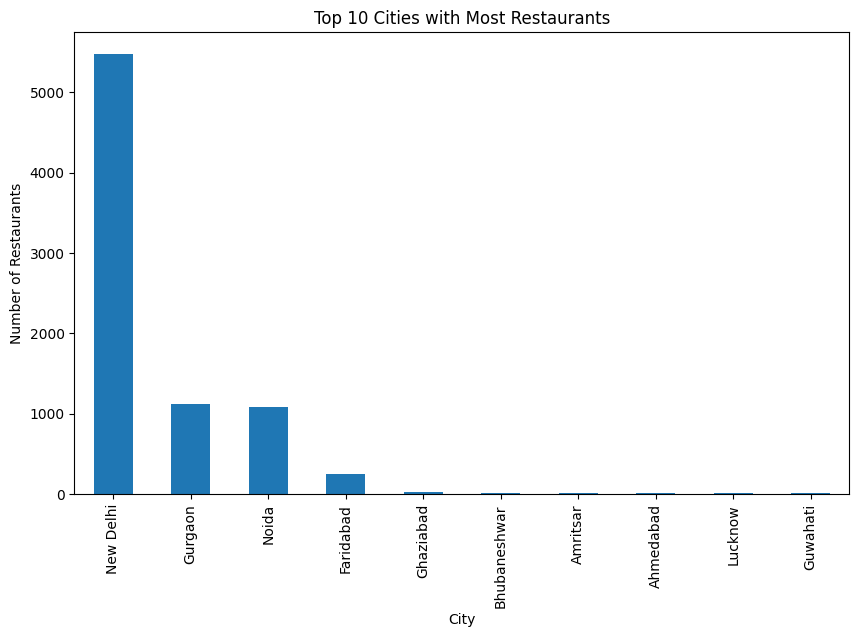

In [11]:
city_distribution = df['City'].value_counts()
print("\nCity Distribution:\n", city_distribution.head(10))
city_distribution.head(10).plot(kind='bar', title='Top 10 Cities with Most Restaurants', figsize=(10, 6))
plt.xlabel('City')
plt.ylabel('Number of Restaurants')
plt.show()



Cuisine Distribution:
 Cuisines
North Indian                      945
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64


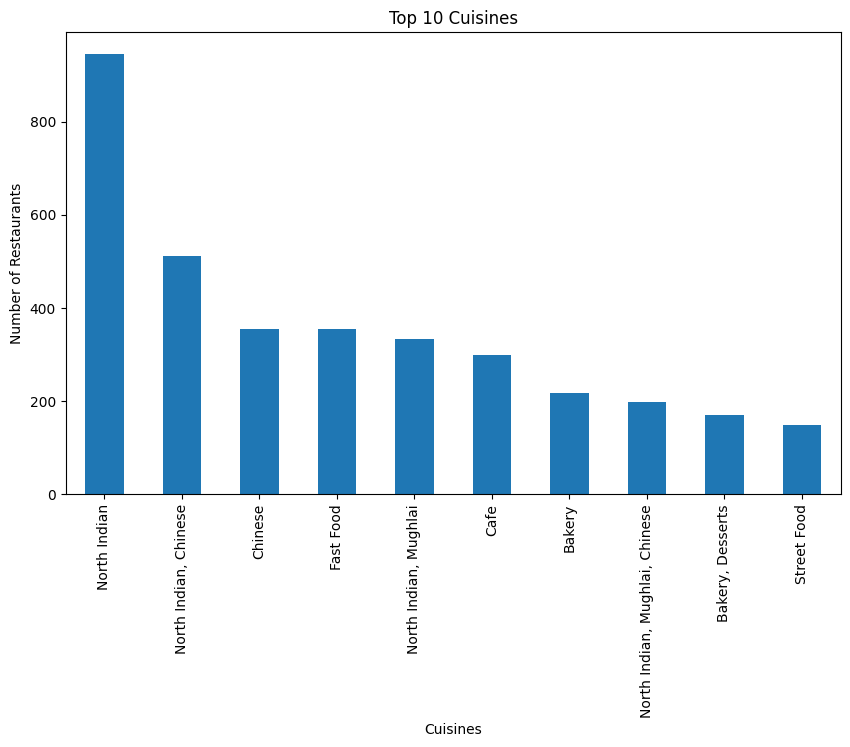

In [12]:
cuisine_distribution = df['Cuisines'].value_counts()
print("\nCuisine Distribution:\n", cuisine_distribution.head(10))  # Top 10 cuisines
cuisine_distribution.head(10).plot(kind='bar', title='Top 10 Cuisines', figsize=(10, 6))
plt.xlabel('Cuisines')
plt.ylabel('Number of Restaurants')
plt.show()


In [ ]:
top_5cuisines = cuisine_distribution.head(5)
print("Top 5 Cuisines:\n", top_5cuisines)

Top 5 Cuisines:
 Cuisines
North Indian             945
North Indian, Chinese    511
Chinese                  354
Fast Food                354
North Indian, Mughlai    334
Name: count, dtype: int64


In [ ]:
top_cities = city_distribution.head(5)
print("Top 5 Cities with the Most Restaurants:\n", top_cities)

Top 5 Cities with the Most Restaurants:
 City
New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
Name: count, dtype: int64


**TASK 3**

In [ ]:
import folium
latitude, longitude = df['Latitude'].mean(), df['Longitude'].mean()
map_restaurants = folium.Map(location=[latitude, longitude], zoom_start=12)
for _, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Restaurant Name']} ({row['Aggregate rating']})",
    ).add_to(map_restaurants)
map_restaurants


Output hidden; open in https://colab.research.google.com to view.

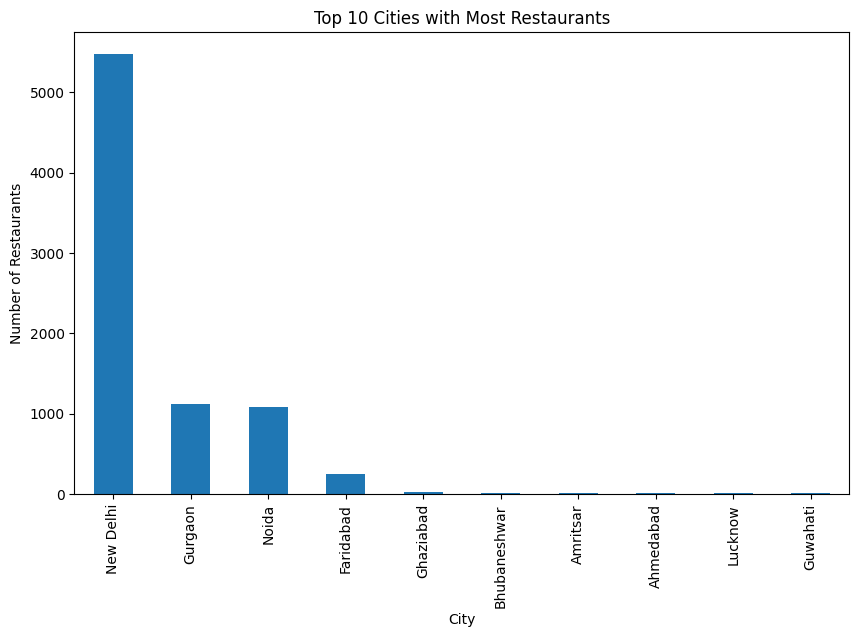

In [13]:
import matplotlib.pyplot as plt
city_distribution = df['City'].value_counts()
city_distribution.head(10).plot(kind='bar', figsize=(10, 6), title="Top 10 Cities with Most Restaurants")
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.show()


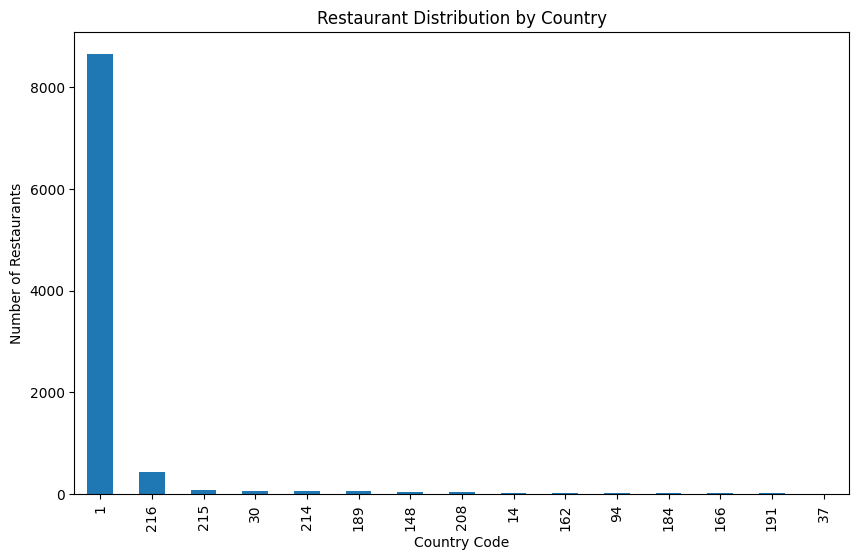

In [14]:
country_distribution = df['Country Code'].value_counts()
country_distribution.plot(kind='bar', figsize=(10, 6), title="Restaurant Distribution by Country")
plt.xlabel("Country Code")
plt.ylabel("Number of Restaurants")
plt.show()


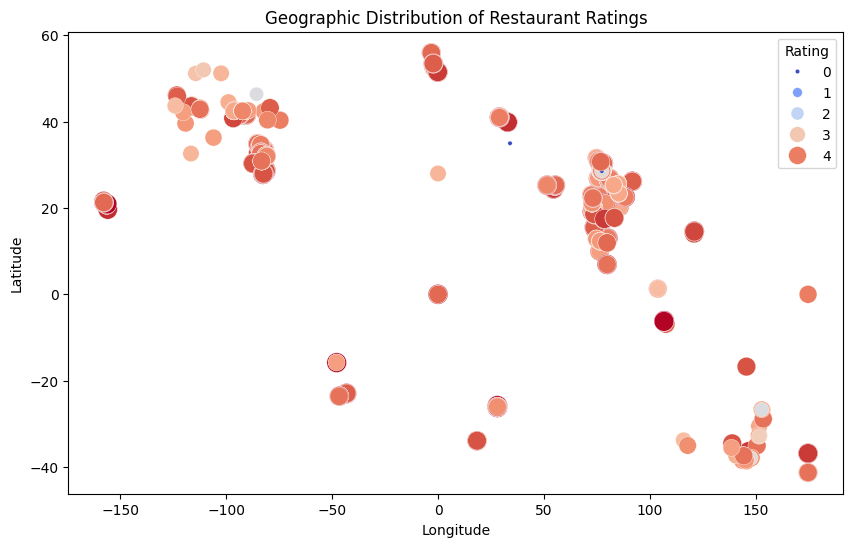

In [15]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Longitude',
    y='Latitude',
    hue='Aggregate rating',
    size='Aggregate rating',
    sizes=(10, 200),
    palette="coolwarm",
    data=df
)
plt.title("Geographic Distribution of Restaurant Ratings")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Rating", bbox_to_anchor=(1, 1))
plt.show()


In [ ]:
correlation = df[['Latitude', 'Longitude', 'Aggregate rating']].corr()
print("Correlation Matrix:\n", correlation)


Correlation Matrix:
                   Latitude  Longitude  Aggregate rating
Latitude          1.000000   0.043207          0.000516
Longitude         0.043207   1.000000         -0.116818
Aggregate rating  0.000516  -0.116818          1.000000


--------------------

# LEVEL 2

**TASK 1**

In [ ]:
# Percentage of restaurants offering table booking
table_booking_percentage = df['Has Table booking'].value_counts(normalize=True) * 100
print("Percentage of Restaurants Offering Table Booking:\n", table_booking_percentage)

# Percentage of restaurants offering online delivery
online_delivery_percentage = df['Has Online delivery'].value_counts(normalize=True) * 100
print("\nPercentage of Restaurants Offering Online Delivery:\n", online_delivery_percentage)


Percentage of Restaurants Offering Table Booking:
 Has Table booking
No     87.875615
Yes    12.124385
Name: proportion, dtype: float64

Percentage of Restaurants Offering Online Delivery:
 Has Online delivery
No     74.337766
Yes    25.662234
Name: proportion, dtype: float64



Average Ratings (Table Booking vs. No Table Booking):
 Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64


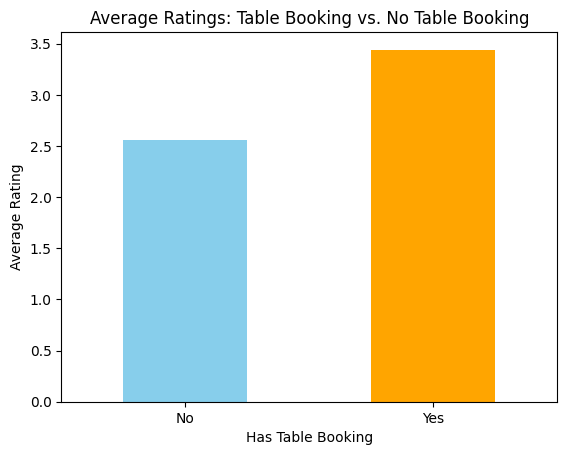

In [ ]:
# Average ratings for restaurants with and without table booking
avg_rating_table_booking = df.groupby('Has Table booking')['Aggregate rating'].mean()
print("\nAverage Ratings (Table Booking vs. No Table Booking):\n", avg_rating_table_booking)

# Visualize the comparison
avg_rating_table_booking.plot(kind='bar', color=['skyblue', 'orange'], title="Average Ratings: Table Booking vs. No Table Booking")
plt.xlabel("Has Table Booking")
plt.ylabel("Average Rating")
plt.xticks(rotation=0)
plt.show()



Online Delivery Availability by Price Range:
 Has Online delivery         No        Yes
Price range                              
1.0                  84.225923  15.774077
2.0                  58.689367  41.310633
3.0                  70.809659  29.190341
4.0                  90.955631   9.044369


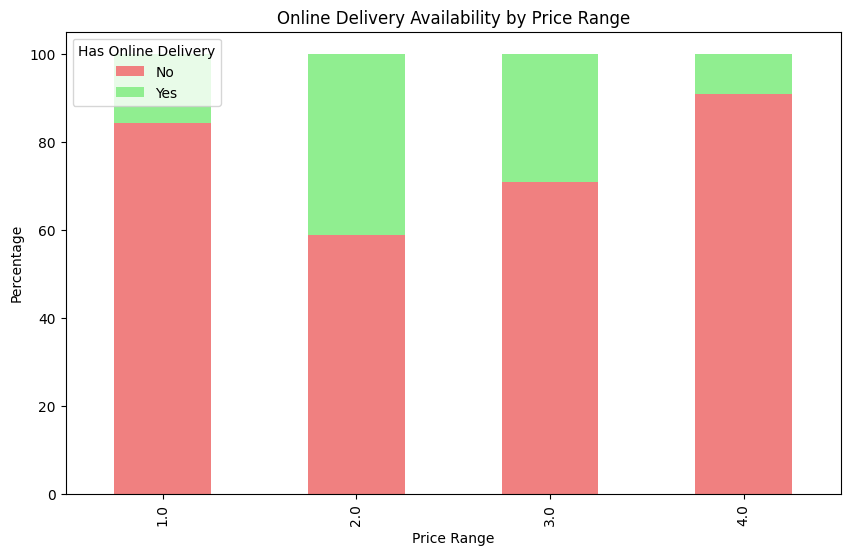

In [ ]:
# Percentage of restaurants with online delivery in each price range
online_delivery_by_price = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack() * 100
print("\nOnline Delivery Availability by Price Range:\n", online_delivery_by_price)

# Visualize the availability of online delivery by price range
online_delivery_by_price.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightcoral', 'lightgreen'])
plt.title("Online Delivery Availability by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Percentage")
plt.legend(title="Has Online Delivery")
plt.show()


**TASK 2**

In [ ]:
# Find the most common price range
most_common_price_range = df['Price range'].value_counts().idxmax()
most_common_price_range_count = df['Price range'].value_counts().max()

print(f"The most common price range is: {most_common_price_range}, appearing {most_common_price_range_count} times.")


The most common price range is: 1.0, appearing 4444 times.



Average Rating by Price Range:
 Price range
1.0    1.999887
2.0    2.941054
3.0    3.683381
4.0    3.817918
Name: Aggregate rating, dtype: float64


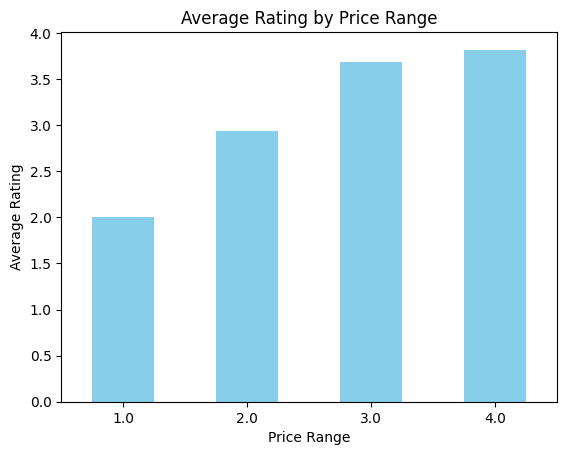

In [ ]:
# Calculate average rating for each price range
avg_rating_by_price = df.groupby('Price range')['Aggregate rating'].mean()
print("\nAverage Rating by Price Range:\n", avg_rating_by_price)

# Visualize average ratings by price range
avg_rating_by_price.plot(kind='bar', color='skyblue', title="Average Rating by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Average Rating")
plt.xticks(rotation=0)
plt.show()




In [ ]:
# Find the price range with the highest average rating
highest_avg_rating_range = avg_rating_by_price.idxmax()

# Get the most frequent 'Rating color' for the price range with the highest average rating
highest_avg_rating_color = df[df['Price range'] == highest_avg_rating_range]['Rating color'].mode()[0]

print(f"The price range with the highest average rating is: {highest_avg_rating_range}, "
      f"and the color representing it is: {highest_avg_rating_color}.")



The price range with the highest average rating is: 4.0, and the color representing it is: Yellow.


**TASK 3**

In [ ]:
# Create a new feature for the length of the restaurant name
df['Restaurant Name Length'] = df['Restaurant Name'].apply(len)
print("Sample Restaurant Name Lengths:\n", df[['Restaurant Name', 'Restaurant Name Length']].head())


Sample Restaurant Name Lengths:
           Restaurant Name  Restaurant Name Length
0        Le Petit Souffle                      16
1        Izakaya Kikufuji                      16
2  Heat - Edsa Shangri-La                      22
3                    Ooma                       4
4             Sambo Kojin                      11


In [ ]:
# Create a new feature for the length of the address
df['Address Length'] = df['Address'].apply(len)
print("Sample Address Lengths:\n", df[['Address', 'Address Length']].head())


Sample Address Lengths:
                                              Address  Address Length
0  Third Floor, Century City Mall, Kalayaan Avenu...              71
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...              67
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...              56
3  Third Floor, Mega Fashion Hall, SM Megamall, O...              70
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...              64


In [ ]:
# Encode 'Has Table booking' column
df['Has Table Booking (Encoded)'] = df['Has Table booking'].apply(lambda x: 1 if x.strip().lower() == 'yes' else 0)
print("Has Table Booking Encoded:\n", df[['Has Table booking', 'Has Table Booking (Encoded)']].head())


Has Table Booking Encoded:
   Has Table booking  Has Table Booking (Encoded)
0               Yes                            1
1               Yes                            1
2               Yes                            1
3                No                            0
4               Yes                            1


In [ ]:
# Encode 'Has Online delivery' column
df['Has Online Delivery (Encoded)'] = df['Has Online delivery'].apply(lambda x: 1 if x.strip().lower() == 'yes' else 0)
print("Has Online Delivery Encoded:\n", df[['Has Online delivery', 'Has Online Delivery (Encoded)']].head())


Has Online Delivery Encoded:
   Has Online delivery  Has Online Delivery (Encoded)
0                  No                              0
1                  No                              0
2                  No                              0
3                  No                              0
4                  No                              0


# LEVEL 3

**TASK 1**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Select features and target variable
X = df.drop(['Aggregate rating', 'Restaurant ID', 'Restaurant Name', 'Address'], axis=1)
y = df['Aggregate rating']

# Encode categorical variables
categorical_cols = X.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

# Handle any remaining NaN values
X.fillna(0, inplace=True)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (7640, 21)
Testing set size: (1911, 21)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train a linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = lr_model.predict(X_test)
print("Linear Regression:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_lr))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lr))
print("R2 Score:", r2_score(y_test, y_pred_lr))


Linear Regression:
Mean Absolute Error: 0.9395214400875971
Mean Squared Error: 1.2709240288058343
R2 Score: 0.441624265702221


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Train a decision tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_model.predict(X_test)
print("\nDecision Tree Regressor:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_dt))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_dt))
print("R2 Score:", r2_score(y_test, y_pred_dt))



Decision Tree Regressor:
Mean Absolute Error: 0.15154369440083726
Mean Squared Error: 0.056096284667713235
R2 Score: 0.9753543064472999


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train a random forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Regressor:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_rf))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))



Random Forest Regressor:
Mean Absolute Error: 0.11875091575091572
Mean Squared Error: 0.029333978545264244
R2 Score: 0.9871122258775158


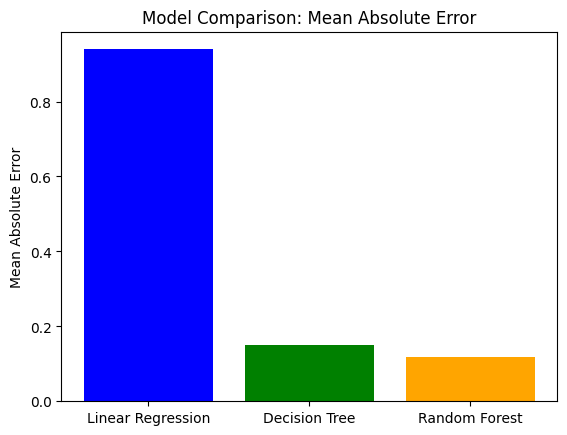

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Collect performance metrics
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
mae = [
    mean_absolute_error(y_test, y_pred_lr),
    mean_absolute_error(y_test, y_pred_dt),
    mean_absolute_error(y_test, y_pred_rf)
]

# Bar chart for Mean Absolute Error
plt.bar(models, mae, color=['blue', 'green', 'orange'])
plt.title("Model Comparison: Mean Absolute Error")
plt.ylabel("Mean Absolute Error")
plt.xticks(rotation=0)
plt.show()


**TASK 2**

Top 10 Cuisines with Highest Average Ratings:
Cuisines
Italian, Deli               4.9
Hawaiian, Seafood           4.9
American, Sandwich, Tea     4.9
Continental, Indian         4.9
European, Asian, Indian     4.9
European, Contemporary      4.9
European, German            4.9
BBQ, Breakfast, Southern    4.9
American, Coffee and Tea    4.9
Sunda, Indonesian           4.9
Name: Aggregate rating, dtype: float64


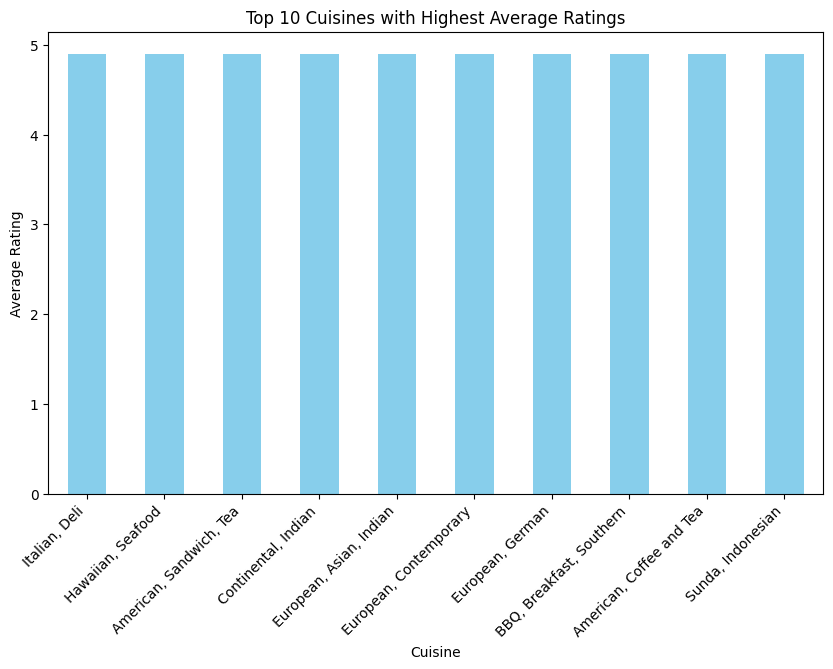

In [ ]:
# Group data by Cuisines and calculate the mean rating
cuisine_rating = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)

# Display the top 10 cuisines with the highest ratings
print("Top 10 Cuisines with Highest Average Ratings:")
print(cuisine_rating.head(10))

# Visualize the data
cuisine_rating.head(10).plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title("Top 10 Cuisines with Highest Average Ratings")
plt.xlabel("Cuisine")
plt.ylabel("Average Rating")
plt.xticks(rotation=45, ha='right')
plt.show()


Top 10 Most Popular Cuisines (Based on Votes):
Cuisines
North Indian, Mughlai             53747
North Indian                      48967
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian                      16433
Mughlai, North Indian             15275
Italian                           14799
Name: Votes, dtype: int64


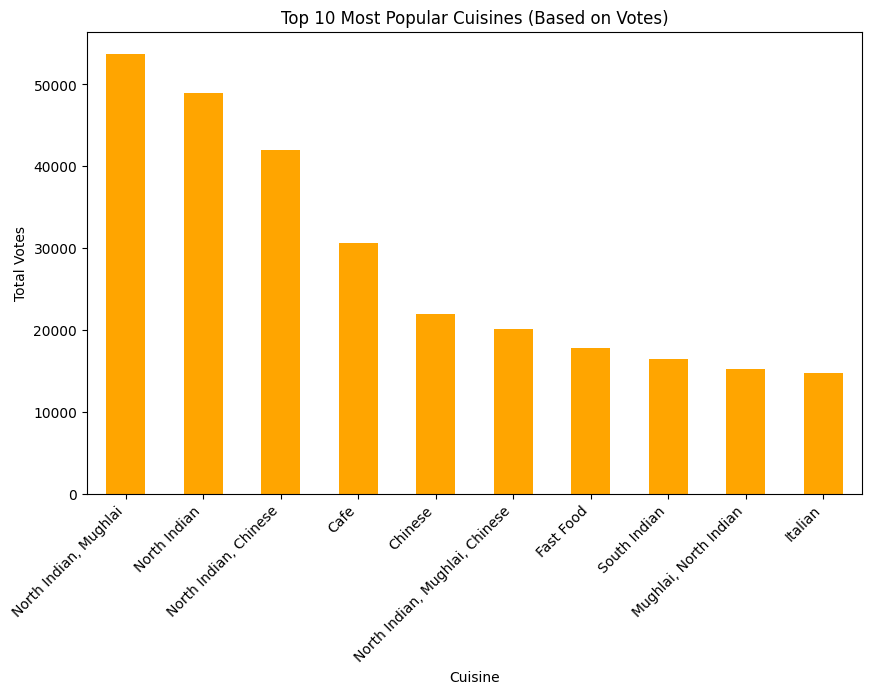

In [ ]:
# Group data by Cuisines and calculate the total votes
cuisine_votes = df.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)

# Display the top 10 cuisines with the most votes
print("Top 10 Most Popular Cuisines (Based on Votes):")
print(cuisine_votes.head(10))

# Visualize the data
cuisine_votes.head(10).plot(kind='bar', color='orange', figsize=(10, 6))
plt.title("Top 10 Most Popular Cuisines (Based on Votes)")
plt.xlabel("Cuisine")
plt.ylabel("Total Votes")
plt.xticks(rotation=45, ha='right')
plt.show()


Cuisines with High Ratings and Popularity:
                          Average Rating  Total Votes
Cuisines                                             
Italian, Deli                        4.9         1424
Hawaiian, Seafood                    4.9         1343
American, Sandwich, Tea              4.9         1457
Continental, Indian                  4.9          641
European, Asian, Indian              4.9          621
European, Contemporary               4.9          441
European, German                     4.9         1413
BBQ, Breakfast, Southern             4.9          249
American, Coffee and Tea             4.9          570
Sunda, Indonesian                    4.9         5514


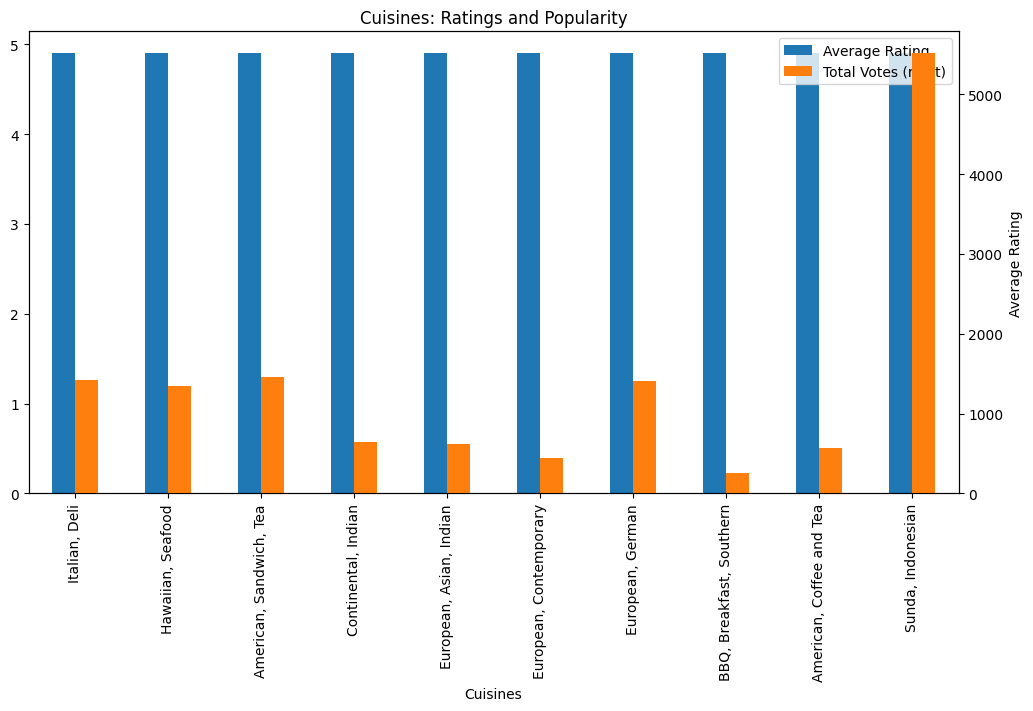

In [ ]:
# Merge average ratings and total votes for cuisines
cuisine_analysis = pd.DataFrame({
    'Average Rating': cuisine_rating,
    'Total Votes': cuisine_votes
}).sort_values(by='Average Rating', ascending=False)

# Display the top 10 cuisines receiving higher ratings
print("Cuisines with High Ratings and Popularity:")
print(cuisine_analysis.head(10))

# Visualize the relationship between ratings and votes
cuisine_analysis.head(10).plot(kind='bar', figsize=(12, 6), secondary_y='Total Votes')
plt.title("Cuisines: Ratings and Popularity")
plt.ylabel("Average Rating")
plt.xlabel("Cuisines")
plt.xticks(rotation=45, ha='right')
plt.show()


**TASK 3**

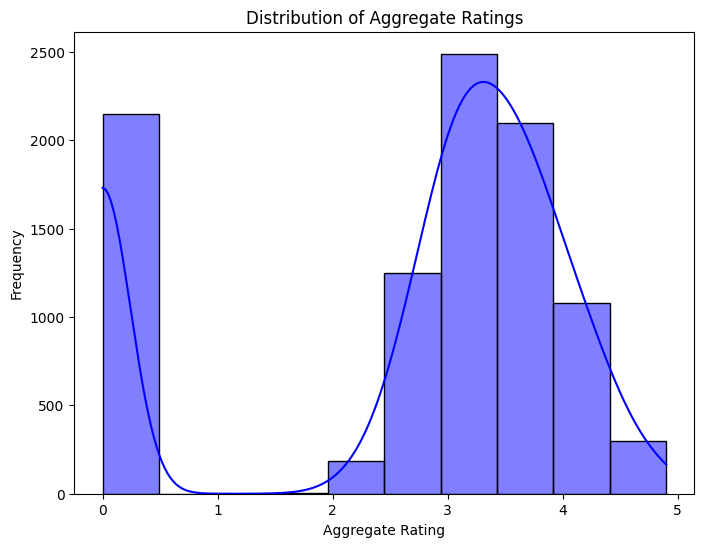

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for Aggregate Ratings
plt.figure(figsize=(8, 6))
sns.histplot(df['Aggregate rating'], bins=10, kde=True, color='blue')
plt.title("Distribution of Aggregate Ratings")
plt.xlabel("Aggregate Rating")
plt.ylabel("Frequency")
plt.show()


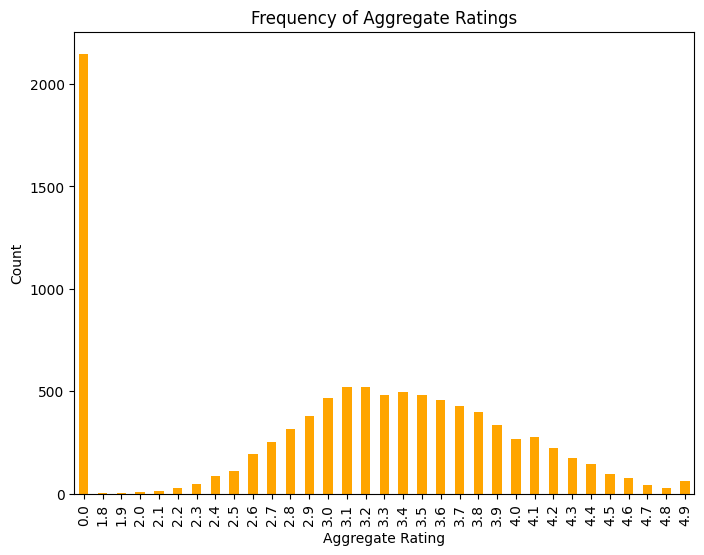

In [ ]:
# Bar plot for the frequency of each unique rating
plt.figure(figsize=(8, 6))
df['Aggregate rating'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title("Frequency of Aggregate Ratings")
plt.xlabel("Aggregate Rating")
plt.ylabel("Count")
plt.show()


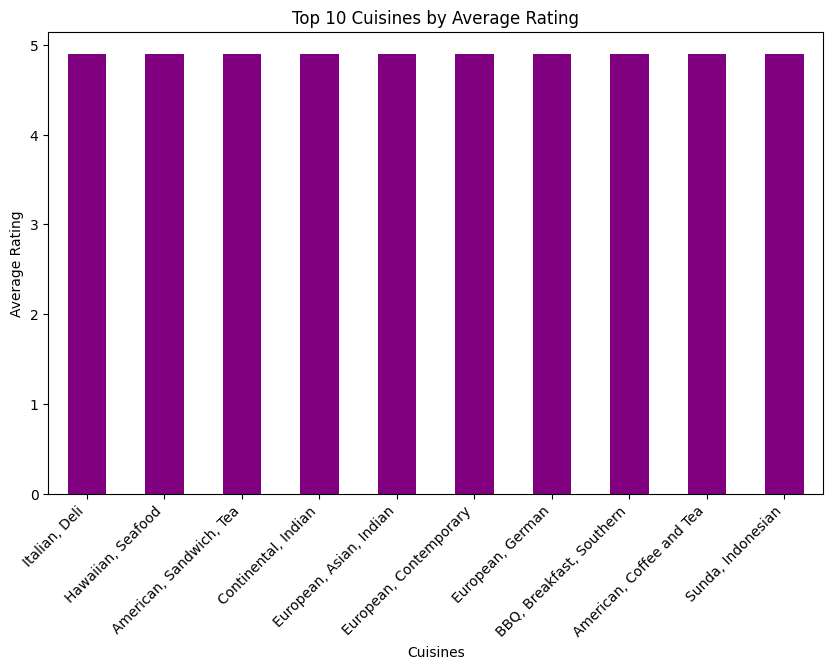

In [ ]:
# Average ratings by cuisine
avg_rating_cuisines = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(10)

# Bar plot for top cuisines
avg_rating_cuisines.plot(kind='bar', color='purple', figsize=(10, 6))
plt.title("Top 10 Cuisines by Average Rating")
plt.xlabel("Cuisines")
plt.ylabel("Average Rating")
plt.xticks(rotation=45, ha='right')
plt.show()


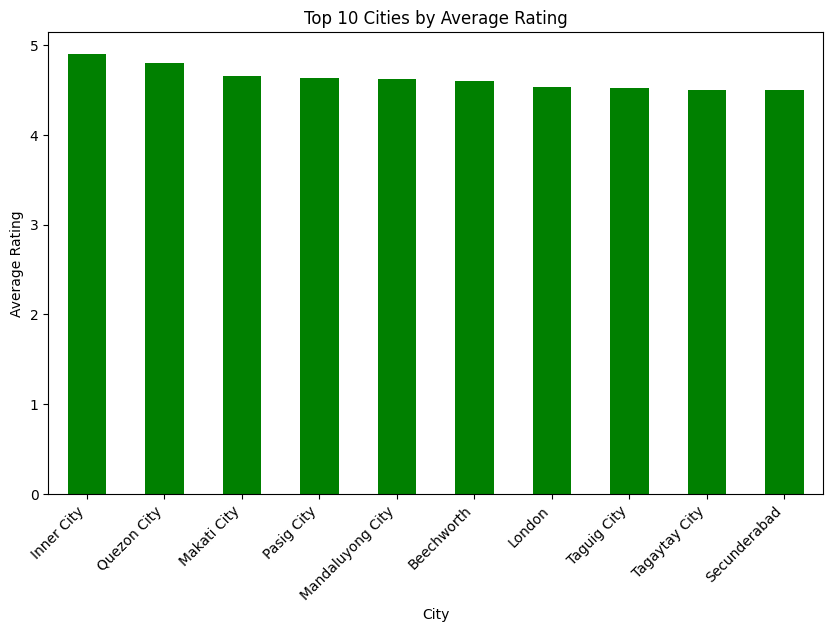

In [ ]:
# Average ratings by city
avg_rating_cities = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10)

# Bar plot for top cities
avg_rating_cities.plot(kind='bar', color='green', figsize=(10, 6))
plt.title("Top 10 Cities by Average Rating")
plt.xlabel("City")
plt.ylabel("Average Rating")
plt.xticks(rotation=45, ha='right')
plt.show()


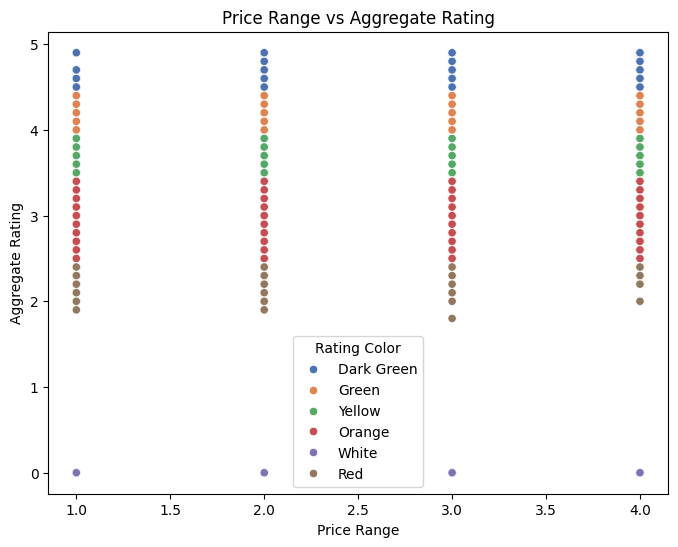

In [ ]:
# Scatter plot for Price Range and Ratings
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price range', y='Aggregate rating', data=df, hue='Rating color', palette='deep')
plt.title("Price Range vs Aggregate Rating")
plt.xlabel("Price Range")
plt.ylabel("Aggregate Rating")
plt.legend(title="Rating Color")
plt.show()


<ipython-input-45-65b268908a20>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cuisines', y='Aggregate rating', data=df_top_cuisines, palette='pastel')


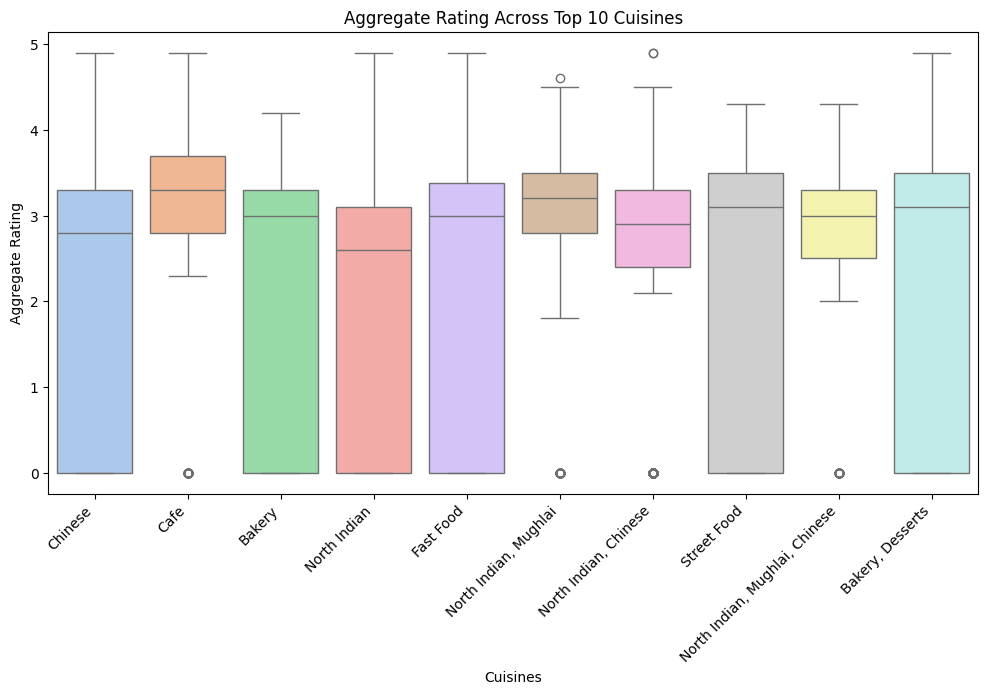

In [ ]:
# Box plot for Cuisines and Ratings (Top 10 cuisines by frequency)
top_cuisines = df['Cuisines'].value_counts().index[:10]
df_top_cuisines = df[df['Cuisines'].isin(top_cuisines)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='Cuisines', y='Aggregate rating', data=df_top_cuisines, palette='pastel')
plt.title("Aggregate Rating Across Top 10 Cuisines")
plt.xlabel("Cuisines")
plt.ylabel("Aggregate Rating")
plt.xticks(rotation=45, ha='right')
plt.show()
